# ----------------------------------------------------------------------
# Supervised Learning - Logistic Regression
# ----------------------------------------------------------------------

## Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Exploring the Data - Reading the dataset file using pandas. Take care about the delimiter.


In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [390]:
# Read dataset using pandas
sd = pd.read_csv("students-data.csv", delimiter=";")

In [391]:
sd.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Q1. Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [392]:
sd.index.name="number"

In [393]:
sd.index.name


'number'

In [394]:
sd.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


In [395]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no


# Q2. Transform Data


*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [396]:
sd.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [397]:
sd.select_dtypes(exclude=['number']).head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


# Q3. Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

#### Answer:

In [398]:
sd["age"].var()



1.6282850350189455

In [399]:
sd_num=sd.select_dtypes(include=["number"])

In [400]:
sd_num.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [401]:
t=list(sd.columns)
for i in t:
    if(sd[i].dtypes=='int64'):
        if(sd[i].var()<1):
        #print(sd[i].head())
            sd.drop(labels=i,inplace=True,axis=1)
sd.head()
        
    
    
        

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [402]:
sd.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

In [403]:
sd.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
goout          int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Q4. Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [404]:
col=list(sd.columns)
for i in col:
    if(sd[i].dtypes=="object"):
        print(sd[i].value_counts())
    if(sd[i].dtype=="object"):
        sd=pd.get_dummies(sd,columns=[i],drop_first=True)
    

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    307
R     88
Name: address, dtype: int64
GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
no     344
yes     51
Name: schoolsup, dtype: int64
yes    242
no     153
Name: famsup, dtype: int64
no     214
yes    181
Name: paid, dtype: int64
yes    201
no     194
Name: activities, dtype: int64
yes    314
no      81
Name: nursery, dtype: int64
yes    375
no      20
Name: higher, dtype: int64
yes    329
no      66
Name: internet, dtype: int64
no     263
yes    132
Name: romantic, 

In [405]:
sd.head()
    

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,5,5,6,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,7,8,10,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,15,14,15,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,6,10,10,...,0,0,0,1,1,0,1,1,0,0


# Q5. Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [359]:
lis=sd.iloc[0:0,7:10]
lis

,G1,G2,G3
number,,,


In [406]:
sd['G1'] = np.where((sd['G1'] < 10),0,sd['G1'])

In [408]:
sd['G1'] = np.where((sd['G1'] >=10),1,sd['G1'])

In [410]:
sd['G2'] = np.where((sd['G2'] < 10),0,sd['G2'])

In [412]:
sd['G2'] = np.where((sd['G2'] >= 10),1,sd['G1'])

In [414]:
sd['G3'] = np.where((sd['G3'] < 10),0,sd['G3'])

In [416]:
sd['G3'] = np.where((sd['G3'] >= 10),1,sd['G3'])

In [418]:
sd.head(20)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,0,0,1,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,1,1,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,0,1,1,...,0,0,0,1,1,0,1,1,0,0
5,16,4,3,2,2,5,10,1,1,1,...,1,0,0,1,1,1,1,1,1,0
6,16,2,2,4,1,3,0,1,1,1,...,1,0,0,0,0,0,1,1,1,0
7,17,4,4,4,1,1,6,0,0,0,...,1,0,1,1,0,0,1,1,0,0
8,15,3,2,2,1,1,0,1,1,1,...,1,0,0,1,1,0,1,1,1,0


# Q6. Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.

#### Answer:

In [422]:
X=sd.drop('G3',axis=1)
X.head(2)


,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,school_MS,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [426]:
y=sd['G3']
y.head(2)

number
0    0
1    0
Name: G3, dtype: int64

## Visualization

# Q7. Plot G2 and G3 and give your understanding on relation between both variables.

### Hint: Use pd.crosstab(sd.G2,sd.G3).plot(kind='bar')

#### Answer:

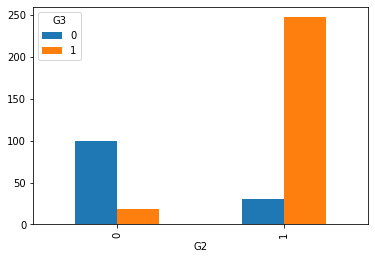

In [432]:
 pd.crosstab(sd.G2,sd.G3).plot(kind='bar')

# Q8. Plot the number of students in each school and number of students with different ages in separate plots.
Hint: use seaborn sns.countplot()
Answer:


In [438]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 36 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
goout                395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
G1                   395 non-null int64
G2                   395 non-null int64
G3                   395 non-null int64
school_MS            395 non-null uint8
sex_M                395 non-null uint8
address_U            395 non-null uint8
famsize_LE3          395 non-null uint8
Pstatus_T            395 non-null uint8
Mjob_health          395 non-null uint8
Mjob_other           395 non-null uint8
Mjob_services        395 non-null uint8
Mjob_teacher         395 non-null uint8
Fjob_health          395 non-null uint8
Fjob_other           395 non-null uint8
Fjob_services        395 non-null uint8
Fjob_teacher   

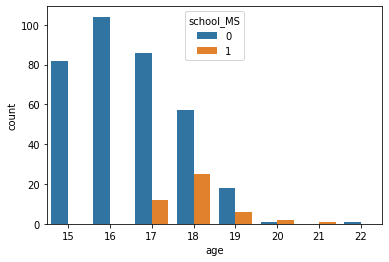

In [442]:
import seaborn as sns
sns.countplot(x='age',hue='school_MS',data=sd)

# Q9. Training and testing data split

So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.
Hint: check train_test_split() from sklearn
Answer:
In [ ]:



​

In [443]:
from sklearn.model_selection import train_test_split

In [446]:
30000/395

75.9493670886076

In [445]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.76,random_state=1)

In [449]:
X_train.shape

(300, 35)

In [450]:
X_test.shape

(95, 35)

In [451]:
print(y_train.shape)
print(y_test.shape)

(300,)
(95,)


# Q10. - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*

#### Answer:

In [481]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [455]:
lrm=LogisticRegression()

In [456]:
lrm.fit(X_train,y_train)

C:\Users\darsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [458]:
y_pred=lrm.predict(X_test)

In [465]:
t=list(X_train.columns)
coef_df=pd.DataFrame(lrm.coef_,columns=t)
coef_df['intercept']=lrm.intercept_
coef_df


,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,school_MS,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,intercept
0,-0.128206,0.053398,-0.194056,-0.420815,0.270368,-0.088468,-0.031889,1.117697,3.027888,0.246726,...,-0.275879,-0.555908,-0.290125,0.456621,-0.180268,-0.0325,0.866102,0.50186,-0.873303,0.337691


In [483]:
model_sc=lrm.score(X_test,y_test)
print(model_sc)

0.8526315789473684


In [484]:
lrm.score(X_train,y_train)

0.9

In [487]:
a=confusion_matrix(y_test,y_pred)

In [489]:
%recall

In [ ]:
0.9

In [ ]:
[[21  7]
 [ 7 60]]

In [491]:
f1_score(y_test,y_pred)

0.8955223880597015

In [493]:
accuracy_score(y_test,y_pred)

0.8526315789473684

# ----------------------------------------------------------------------
# Supervised Leaning - Naive Bayes with Iris Data
# ----------------------------------------------------------------------

In [38]:
#Load all required library
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [39]:
# Load using input file
iris=pd.read_csv("Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Treat NaN's/ Null values found

In [40]:
iris=iris.fillna(0)

### Slice  Iris data set for Independent variables and dependent variables

#### Please note 'Species' is your dependent variable, name it y and independent set data as X

In [41]:
X=iris.iloc[:,:4].values
y=iris['Species'].values

In [42]:
#Check the dataset
print(y)
print(X)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

# Q1.  Find the distribution of target variable (Species) and, Plot the distribution of target variable using histogram

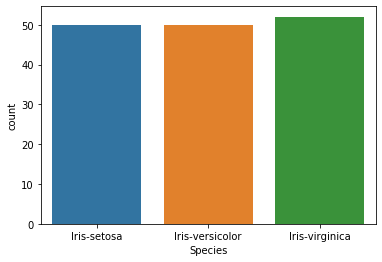

In [12]:
sns.countplot(x="Species",data=iris)

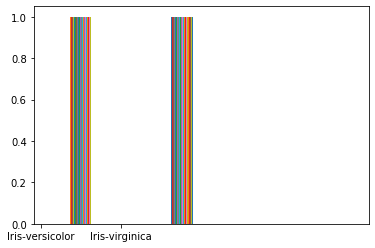

In [22]:
plt.hist(y,bins=[1,2,3,4,5])
plt.show()

In [18]:
# Drop Id variable from data

In [43]:
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [48]:
iris.drop(labels="Id",axis=1).head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [72]:
X=iris.drop(labels=["Species","Id"],axis=1)

In [73]:
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [74]:
y=iris["Species"]
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: Species, dtype: object

# Q2. Find Correlation among all variables and give your insights 

In [75]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.539500,-0.427175,0.793490,0.864447
SepalLengthCm,0.539500,1.000000,0.145802,0.816560,0.668652
SepalWidthCm,-0.427175,0.145802,1.000000,-0.167316,-0.246073
PetalLengthCm,0.793490,0.816560,-0.167316,1.000000,0.936151
PetalWidthCm,0.864447,0.668652,-0.246073,0.936151,1.000000


In [76]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


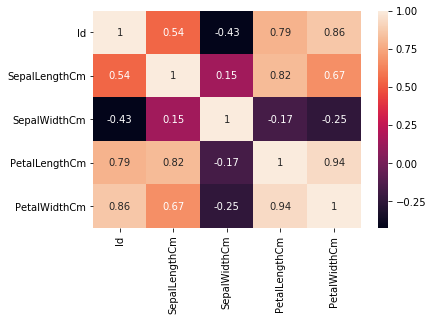

In [77]:
sns.heatmap(iris.corr(),annot=True)

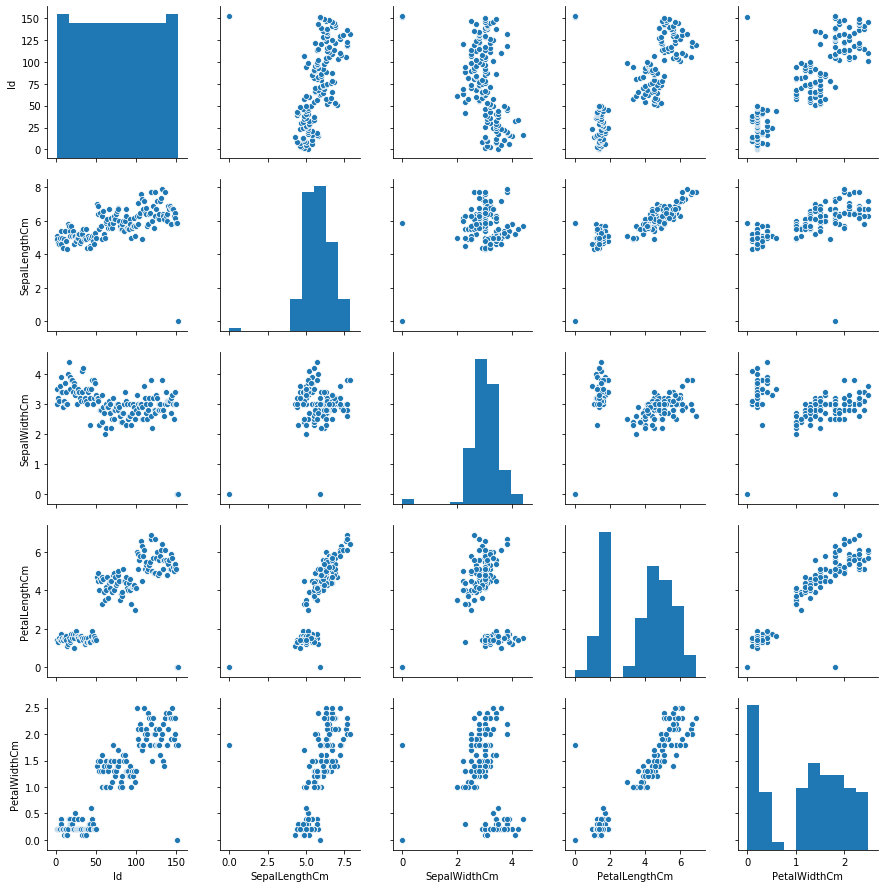

In [78]:
sns.pairplot(iris)

### Split data in Training and test set in 80:20.

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

# Q3. Feature Scaling on X_Train and X_Test

In [80]:
# Use StandardScaler or similar methods

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_Train=scaler.fit_transform(X_train)
sc_Test=scaler.fit_transform(X_test)


array([[-7.09259440e-01,  1.42396322e+00, -1.21871831e+00,
        -1.15368683e+00],
       [-1.05599002e-01, -8.73364107e-01,  7.02112374e-01,
         1.01752434e+00],
       [ 4.98061436e-01, -1.66494161e-01,  1.03139763e+00,
         7.62087729e-01],
       [ 9.00501728e-01,  1.02233257e-02,  7.02112374e-01,
         6.34369425e-01],
       [ 9.00501728e-01,  1.02233257e-02,  8.11874127e-01,
         1.40067925e+00],
       [ 7.99891655e-01, -1.66494161e-01,  4.82588867e-01,
         1.23496211e-01],
       [-2.06209075e-01, -3.43211647e-01,  6.47231497e-01,
         1.01752434e+00],
       [ 4.98061436e-01,  5.40375785e-01,  5.37469744e-01,
         5.06651122e-01],
       [-6.08649367e-01,  7.17093272e-01, -1.27359919e+00,
        -1.28140513e+00],
       [ 5.98671509e-01,  3.63658299e-01,  4.27707990e-01,
         3.78932818e-01],
       [ 1.40355209e+00,  1.07052825e+00,  1.30580202e+00,
         1.65611585e+00],
       [-2.06209075e-01,  1.02233257e-02,  4.27707990e-01,
      

# Q4. Train and Fit NaiveBayes Model

In [ ]:
#Fit the model

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

In [121]:
Naive=GaussianNB()
Naive.fit(sc_Train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [107]:
#Predict

In [123]:
y_pred=Naive.predict(sc_Test)

# Q5.  Print Accuracy and Confusion Matrix and Conclude your findings

In [124]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)

In [126]:
# show accuracy
from sklearn.metrics import accuracy_score

In [128]:
accuracy_score(y_test,y_pred)

1.0

In [132]:
f1_score(y_test,y_pred,average='macro')

1.0

In [ ]:
#Show precision and Recall metrics
from sklearn import metrics

In [137]:
metrics.precision_score(y_test,y_pred,average="macro")

1.0

In [138]:
metrics.recall_score(y_test,y_pred,average="macro")

1.0

The above model predicting test scaled data with 100% accuracy as we have used standard scalared data given to tha model...
